## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.
#### Сделано

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 200 # для возмжности вывода всех параметров на экран
%matplotlib inline
warnings.filterwarnings('ignore')

In [93]:
train = pd.read_csv(r'../../Seminars/Seminar_2/train_housing.csv')

test = pd.read_csv(r'../../Seminars/Seminar_2/test_housing.csv')

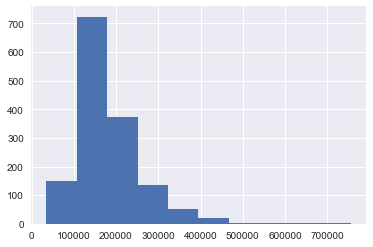

In [94]:
train['SalePrice'].hist()

In [95]:
# Логарифмируем распределение целевой переменной
train['SalePrice'] = np.log1p(train['SalePrice'])

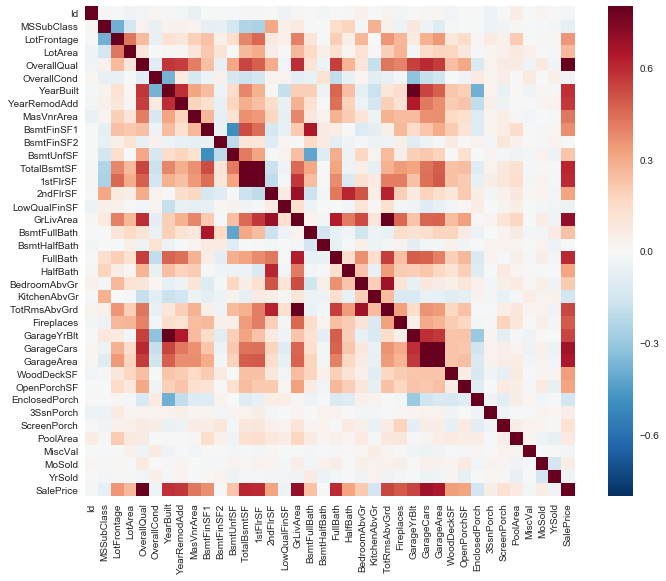

In [96]:
# Строим матрицу корреляции
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

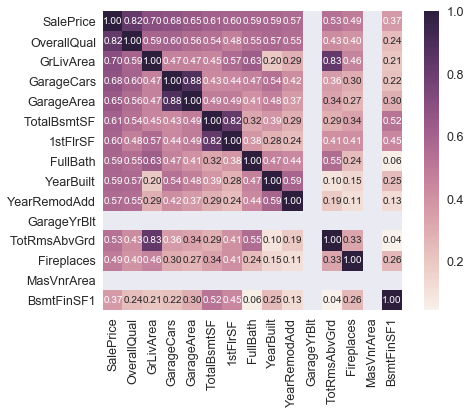

In [97]:
# Выбираем 15 самых "сильных" фичей
k = 15
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

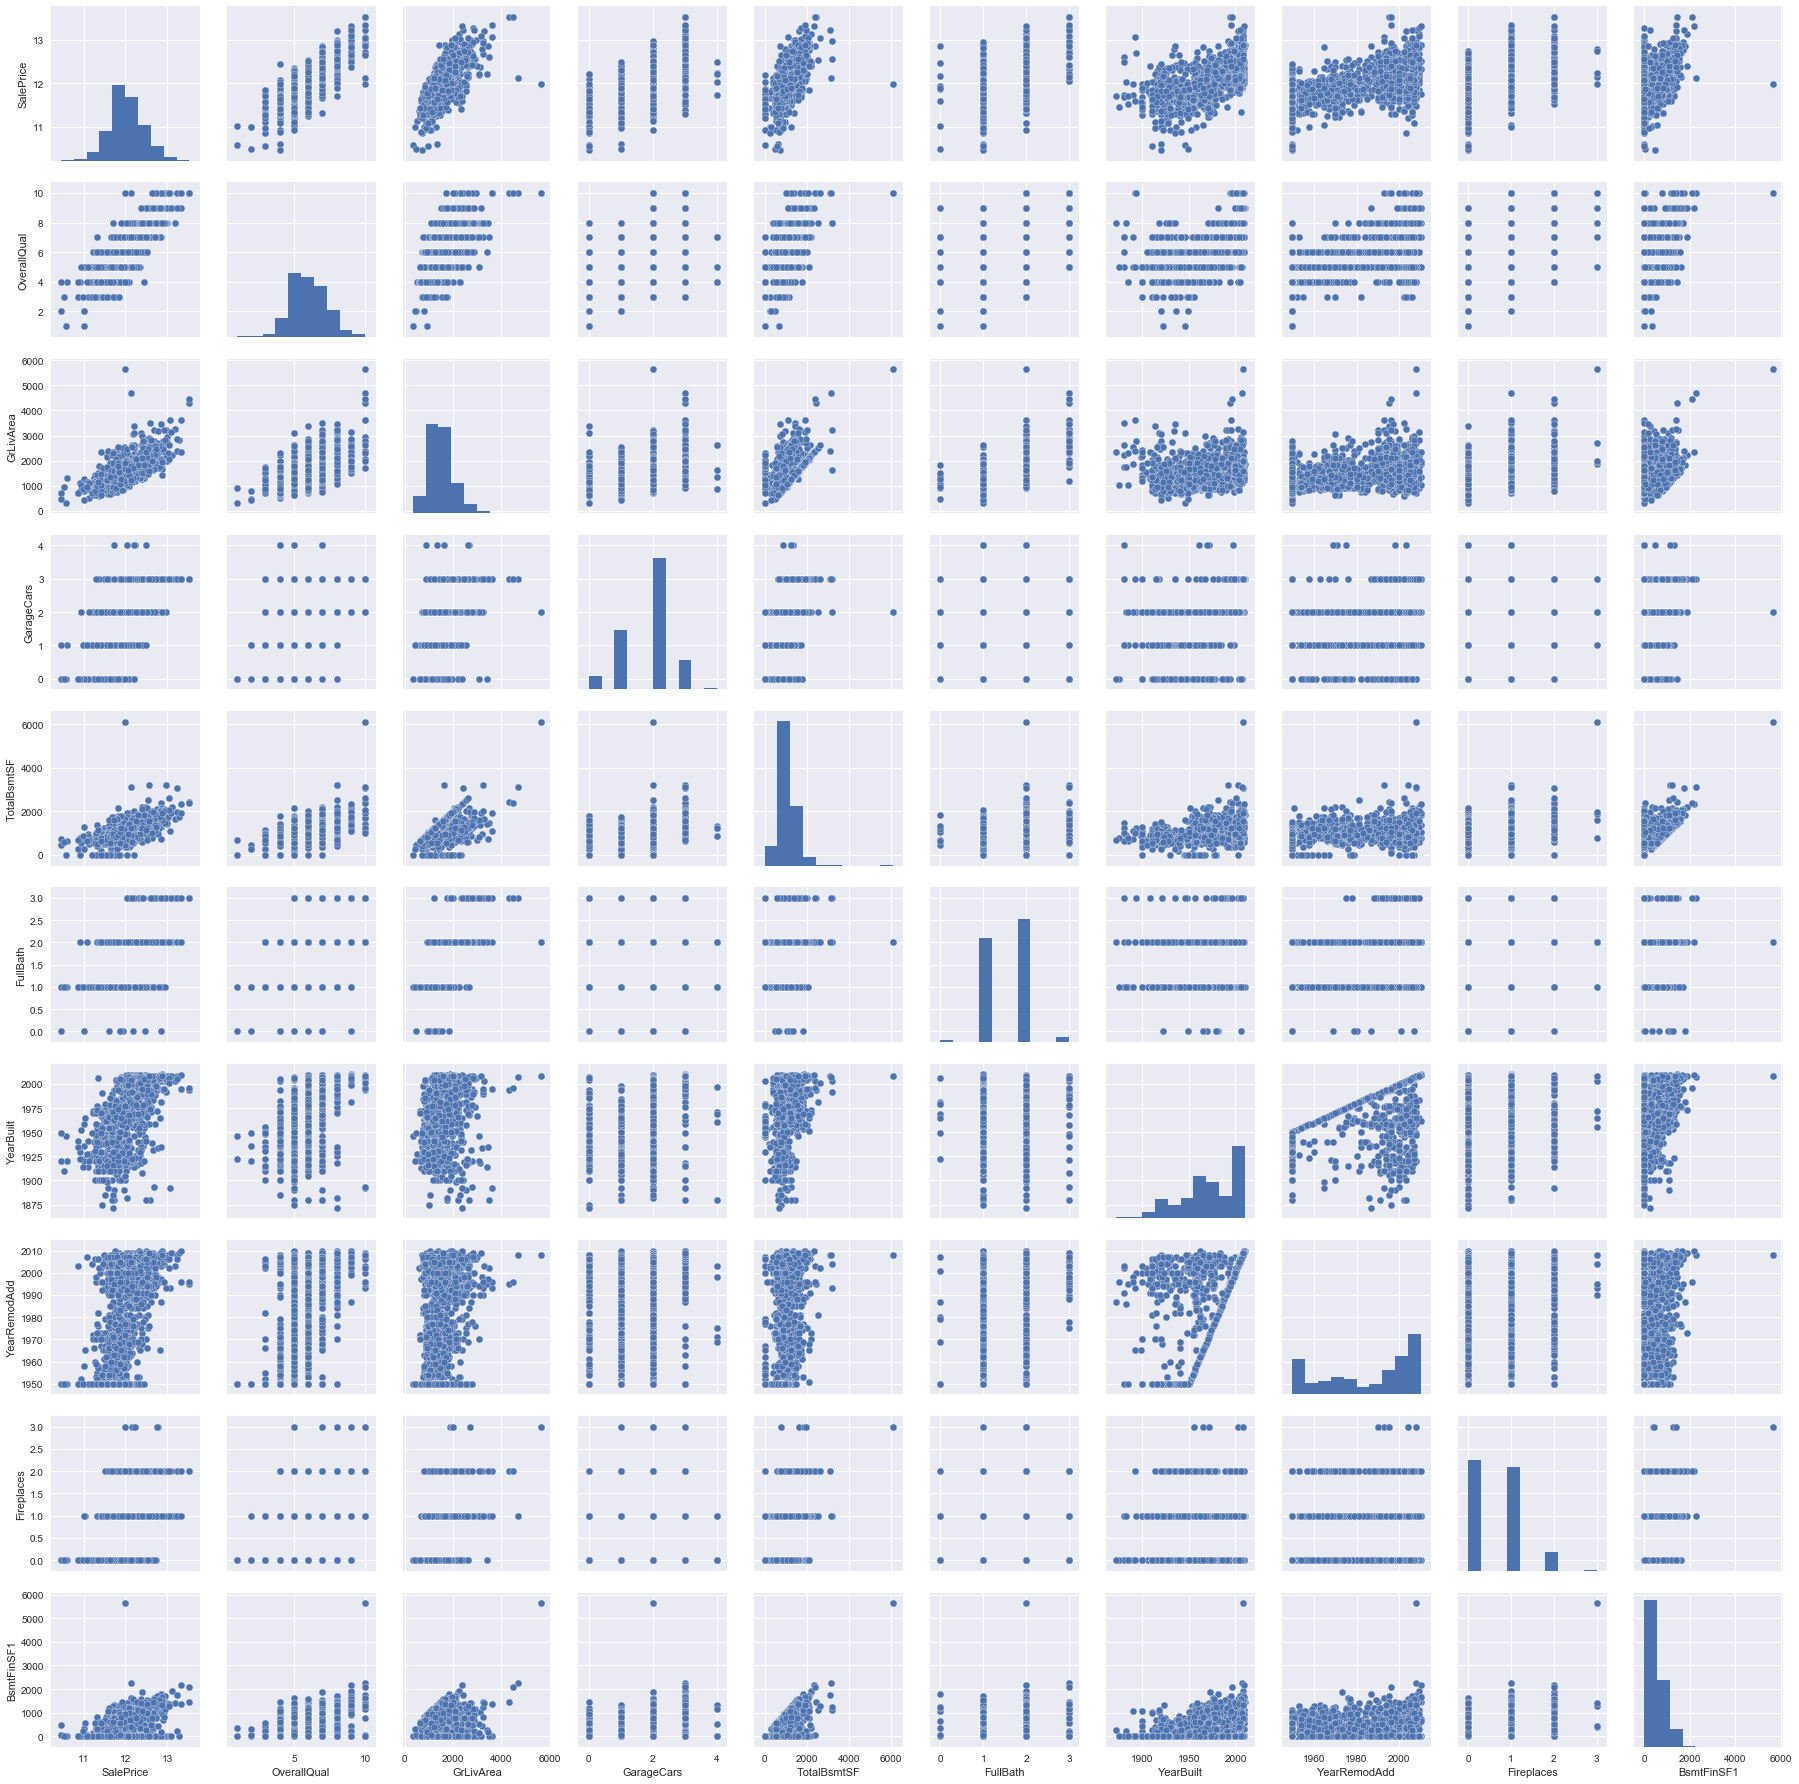

In [98]:
# Попарные корреляции
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1']
sns.pairplot(train[cols], size = 2.5)
plt.show();

#### Далее преобразовываем фичи, чтобы зависимость была похожа на линейную

In [99]:
train['GrLivArea'] = np.log1p(train['GrLivArea'])

In [100]:
m = train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'].mean()
train['TotalBsmtSF'] = train['TotalBsmtSF'].apply(lambda x: m if x ==0 else x)
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])

In [101]:
m = train[train['BsmtFinSF1'] > 0]['BsmtFinSF1'].mean()
train['BsmtFinSF1'] = train['BsmtFinSF1'].apply(lambda x: m if x ==0 else x)
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])

In [102]:
m = train[train['FullBath'] > 0]['FullBath'].mean()
train['FullBath'] = train['FullBath'].apply(lambda x: m if x ==0 else x)
train['FullBath'] = np.log1p(train['FullBath'])

In [103]:
m = train[train['YearRemodAdd'] > 0]['YearRemodAdd'].mean()
train['YearRemodAdd'] = train['YearRemodAdd'].apply(lambda x: m if x == 0 else x)
train['YearRemodAdd'] = np.log1p(train['YearRemodAdd'])

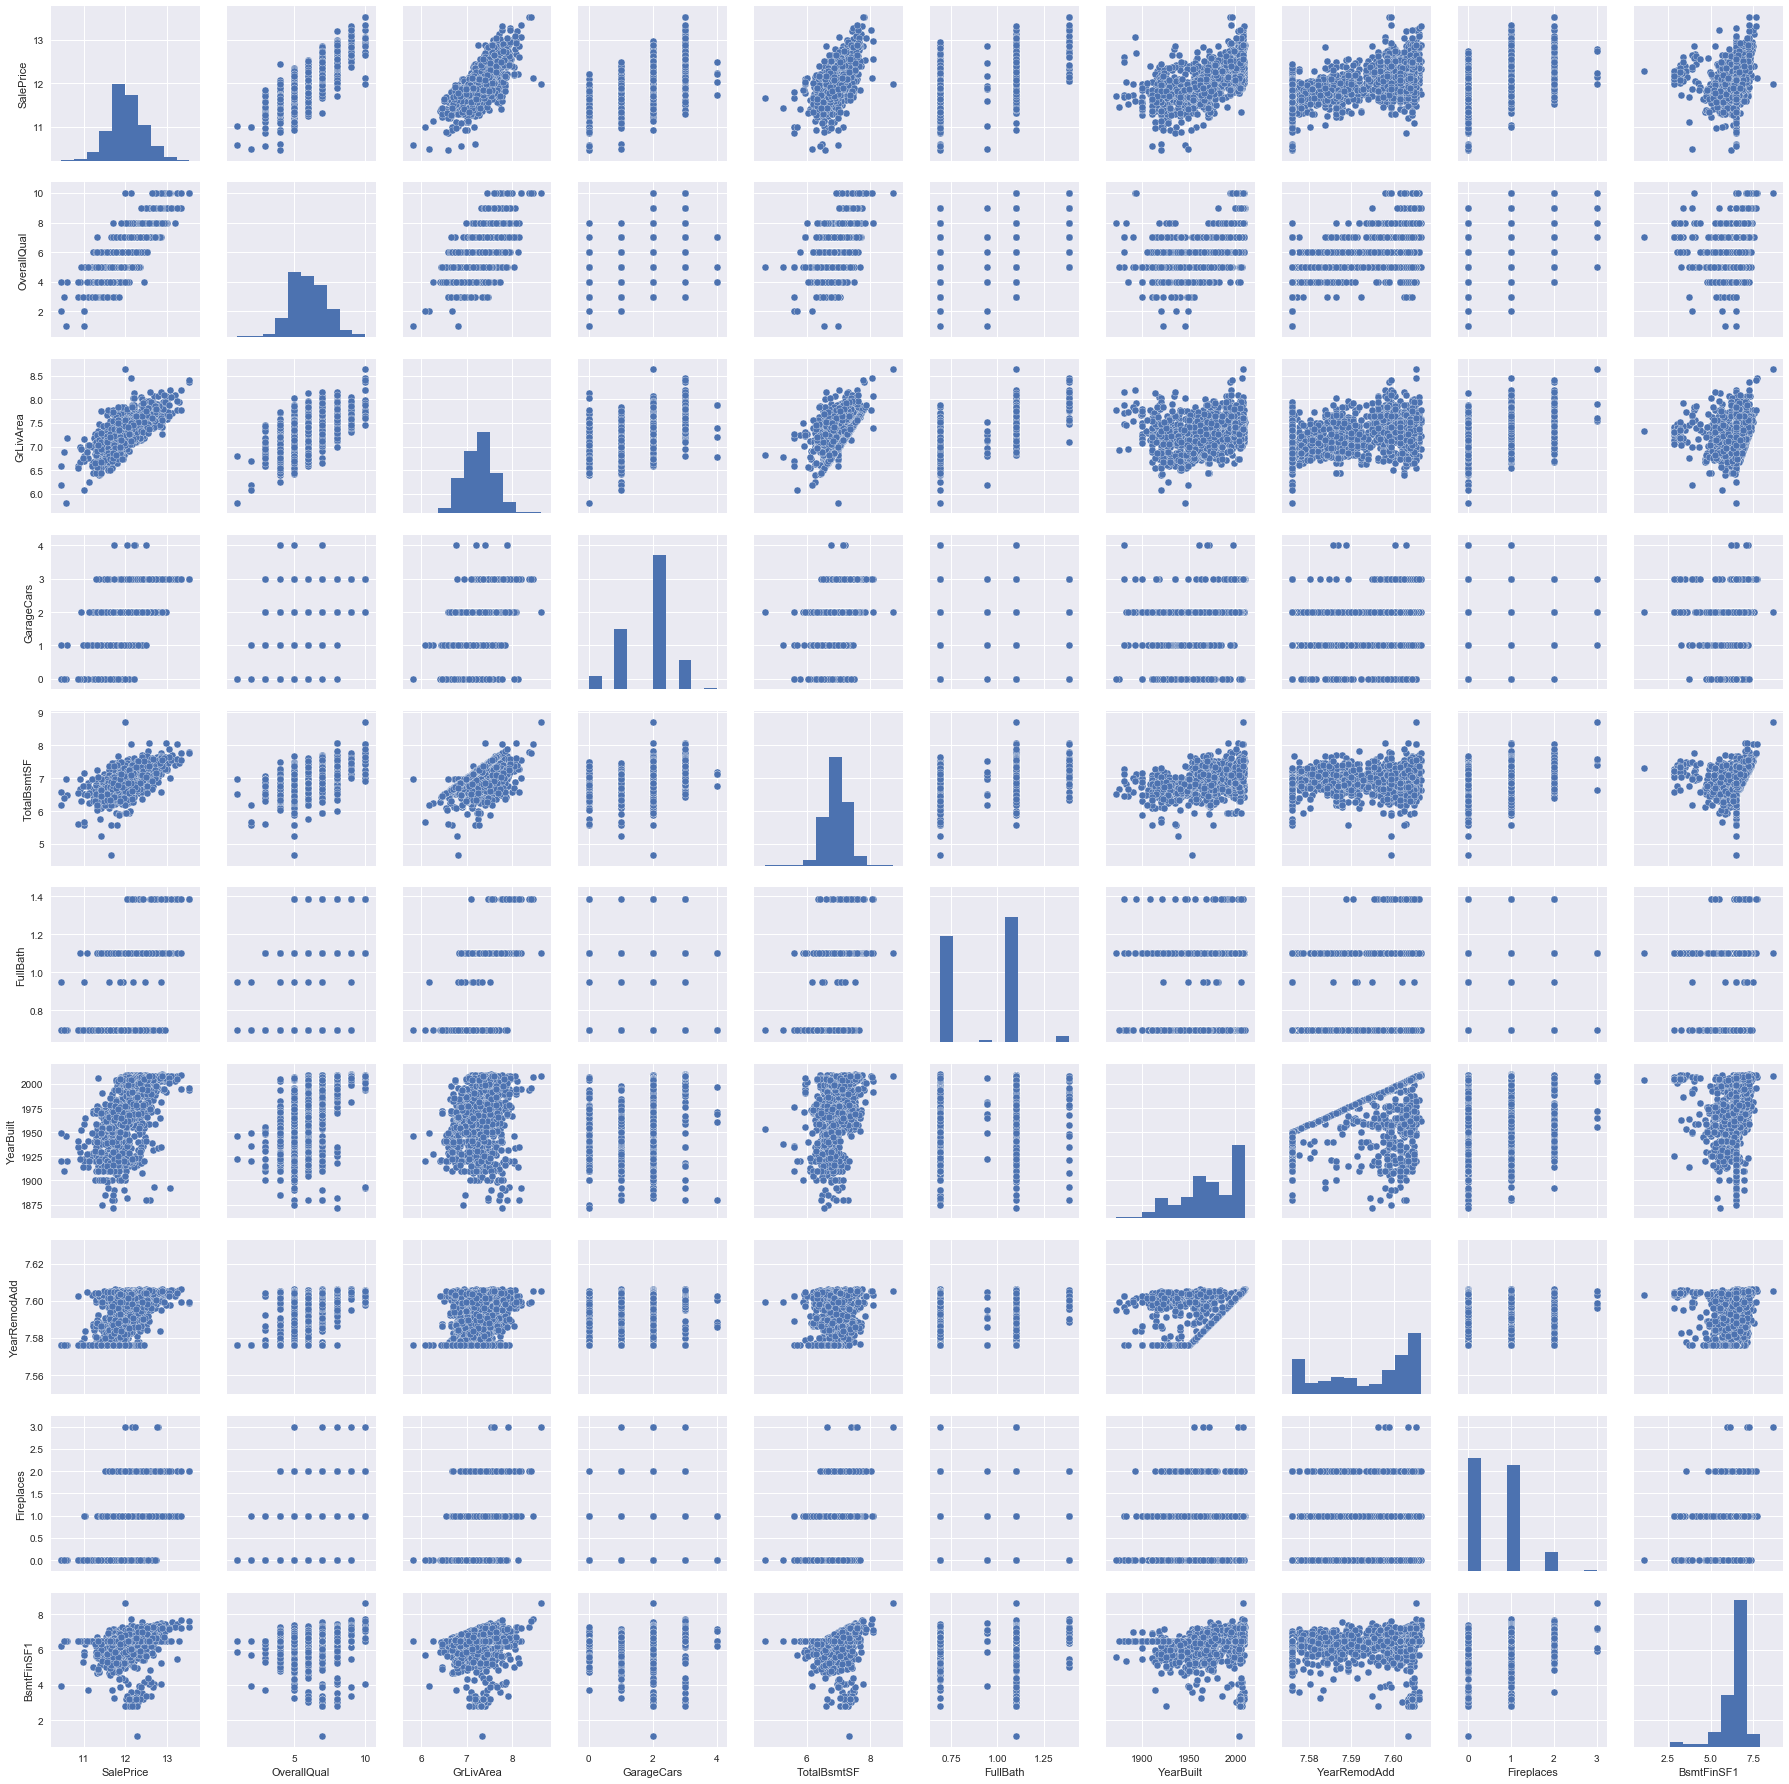

In [104]:
# Попарные корреляции
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1']
sns.pairplot(train[cols], size = 2.5)
plt.show();

С какими типами признаков вы столкнулись?


Ответ: Числовые и категориальные

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html

In [105]:
# Cобираем датасет из категориальных, имеющих смысл, и тех, с которыми мы сработали ранее

Y_train = train['SalePrice']
X_train = pd.concat([train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                            'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1']],
                     train['PoolArea'].apply(lambda x: np.minimum(x, 1)),
                     train['ScreenPorch'].apply(lambda x: np.minimum(x, 1)),
                     train['3SsnPorch'].apply(lambda x: np.minimum(x, 1)),
                     train['EnclosedPorch'].apply(lambda x: np.minimum(x, 1)),
                     train['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1),
                     pd.get_dummies(train['BldgType'], prefix = 'BldgType'),
                     pd.get_dummies(train['HouseStyle'], prefix = 'HouseStyle'),
                     pd.get_dummies(train['Foundation'], prefix = 'Foundation'),
                     pd.get_dummies(train['Functional'], prefix = 'Functional'),
                     pd.get_dummies(train['MSSubClass'], prefix = 'MSSubClass'),
                     pd.get_dummies(train['Condition1'], prefix = 'Condition1'),
                     pd.get_dummies(train['SaleCondition'], prefix = 'SaleCondition'),
                     pd.get_dummies(train['LotConfig'], prefix = 'LotConfig')
                    ], axis=1).fillna(0)

Какие фичи кажутся вам самыми значимыми? Оцените значимость признаков, опираясь на описанный выше алгоритм, либо на ваш личный опыт, постройте для трех самых значимых графики. Как распределены данные? По какому закону?

Попробуйте запустить обучение на разных алгоритмах (пример запуска в семинарах):
1. Линейная регрессия http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. Решающее дерево http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
3. Случайный лес http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Градиентный бустинг http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

И любые другие модели, которые покажутся вам интересными :)

P.S.не забудьте использовать **cross_validation** и **K-Fold!**
Также можно распараллелить процесс обучения, если параметру *n_jobs* в регрессор передать значение *-1*.
С помощью  *cross_val_score* можно оценивать качество построенной модели.
Также у каждого регрессора есть множество *параметров*. Подробно про них можно прочитать в документации http://scikit-learn.org

Пример запуска модели можно найти в **Seminars/Seminar2**.

In [106]:
# Библиотекаи для моделирования

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
lr = LinearRegression()
cross_val_score(lr, X_train, Y_train, scoring='neg_mean_squared_error')

array([-0.02046262, -0.02561022, -0.02370036])

In [108]:
lasso = Lasso(random_state=37)
cross_val_score(lasso, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.10453958, -0.11540841, -0.09777619])

In [111]:
rf = RandomForestRegressor(random_state=32, n_estimators=200)
cross_val_score(rf, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.02391138, -0.0257575 , -0.0203466 ])

In [112]:
xg = GradientBoostingRegressor(max_depth=3, n_estimators=200, random_state=32)
cross_val_score(xg, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.01836125, -0.02235332, -0.01759379])

### Готовим тестовый датасет

In [113]:
test['GrLivArea'] = np.log1p(test['GrLivArea'])

In [114]:
m = test[test['TotalBsmtSF'] > 0]['TotalBsmtSF'].mean()
test['TotalBsmtSF'] = test['TotalBsmtSF'].apply(lambda x: m if x ==0 else x)
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])

In [115]:
m = test[test['BsmtFinSF1'] > 0]['BsmtFinSF1'].mean()
test['BsmtFinSF1'] = test['BsmtFinSF1'].apply(lambda x: m if x ==0 else x)
test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])

In [116]:
m = test[test['FullBath'] > 0]['FullBath'].mean()
test['FullBath'] = test['FullBath'].apply(lambda x: m if x ==0 else x)
test['FullBath'] = np.log1p(test['FullBath'])

In [117]:
m = test[test['YearRemodAdd'] > 0]['YearRemodAdd'].mean()
test['YearRemodAdd'] = test['YearRemodAdd'].apply(lambda x: m if x == 0 else x)
test['YearRemodAdd'] = np.log1p(test['YearRemodAdd'])

In [118]:
X_test = pd.concat([test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                            'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1']],
                     test['PoolArea'].apply(lambda x: np.minimum(x, 1)),
                     test['ScreenPorch'].apply(lambda x: np.minimum(x, 1)),
                     test['3SsnPorch'].apply(lambda x: np.minimum(x, 1)),
                     test['EnclosedPorch'].apply(lambda x: np.minimum(x, 1)),
                     test['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1),
                     pd.get_dummies(test['BldgType'], prefix = 'BldgType'),
                     pd.get_dummies(test['HouseStyle'], prefix = 'HouseStyle'),
                     pd.get_dummies(test['Foundation'], prefix = 'Foundation'),
                     pd.get_dummies(test['Functional'], prefix = 'Functional'),
                     pd.get_dummies(test['MSSubClass'], prefix = 'MSSubClass'),
                     pd.get_dummies(test['Condition1'], prefix = 'Condition1'),
                     pd.get_dummies(test['SaleCondition'], prefix = 'SaleCondition'),
                     pd.get_dummies(test['LotConfig'], prefix = 'LotConfig')
                    ], axis=1).fillna(0)

In [119]:
#функция для формирования файла для отправки в соревнование
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

In [120]:
xg = GradientBoostingRegressor(max_depth=3, n_estimators=200, random_state=32)
xg.fit(X_train, Y_train)
preds = xg.predict(X_test)

In [122]:
rf = RandomForestRegressor(random_state=32, n_estimators=200)
rf.fit(X_train, Y_train)
preds = rf.predict(X_test)

In [123]:
submit(np.expm1(preds))

### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

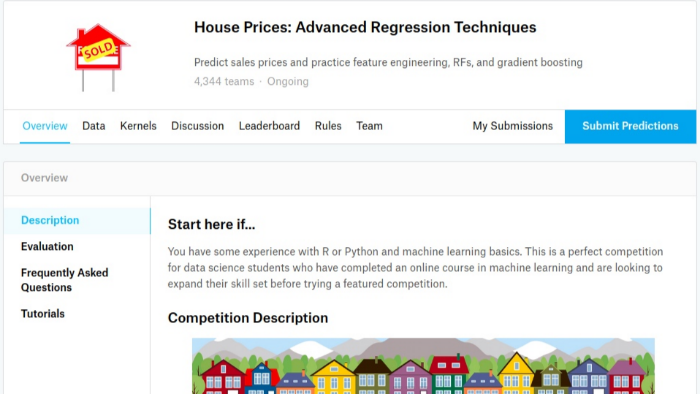

In [16]:
from IPython.display import Image
Image("1.png")

Идеи, как можно улучшить результат:
* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить регрессор
* Сгенерировать новые признаки

### Часть 4
Опишите полученные результаты, какого скора Вы смогли добиться, какое место заняли? Какой алгоритм оказался лучше других? Можете ли Вы объяснить, почему так вышло?

Ответ: